<a href="https://colab.research.google.com/github/KaylumCassidy/FYP/blob/main/EDA_C20323831_FYP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import io
import requests


from plotly.offline import iplot
import plotly.graph_objs as go
from plotly import tools
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

from datetime import tzinfo, timedelta, datetime, date

# Any results you write to the current directory are saved as output.

import plotly.express as px
import seaborn as sns

## Eirgrid Wind generation

In [6]:

#sample_url  = 'https://www.smartgriddashboard.com/DashboardService.svc/data?area=windactual&region=ALL&datefrom=01-Jan-2022+00%3A00&dateto=31-Jan-2023+23%3A59'

sample_url = 'http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ALL&datefrom=01-Jan-2018%2000:00&dateto=31-Jan-2018%2023:59'

url_base = 'http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ALL&datefrom=01-'
url_mid = '%2000:00&dateto='
url_end = '%2023:59'

years = ['2017', '2018', '2019', '2020', '2021']
  #years = ['2020', '2021']
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
endDay= [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
tempds = []
months_years = []

for year in years:
    i = 0
    for month in months:
      # Stop after Aug 2021
      endday = endDay[i]
      if (year == '2021') & (month == 'Oct'):
        break
      elif (year == '2020') & (month == 'Feb'):
        endday = 29

      url = url_base + month + '-' + year + url_mid + str(endday) + '-' + month + '-' + year + url_end
      i = i+1
      print(url)
      s = requests.get(url).content

      mds = pd.read_csv(io.StringIO(s.decode('utf-8')), na_values='-')
      mds['date'] = pd.to_datetime(mds["DATE & TIME"], infer_datetime_format=True, errors='ignore')
      DT = pd.to_datetime(mds["DATE & TIME"], infer_datetime_format=True, errors='ignore').dt
      mds['Year'] = DT.year
      mds['Month'] = DT.strftime('%b')
      mds['DayTime'] = DT.strftime('%d, %R')
      tempds.append(mds)
      months_years.append(month + '-' + year)
      #url = 'http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ALL&datefrom=01-Dec-2020%2000:00&dateto=31-Dec-2020%2023:59'


wgds = pd.concat(tempds, keys=months_years)

wgds = wgds.reset_index()
wgds = wgds.drop('level_0', axis=1)
wgds = wgds.drop('level_1', axis=1)
wgds = wgds.drop('DATE & TIME', axis=1)



http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ALL&datefrom=01-Jan-2017%2000:00&dateto=31-Jan-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ALL&datefrom=01-Feb-2017%2000:00&dateto=28-Feb-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ALL&datefrom=01-Mar-2017%2000:00&dateto=31-Mar-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ALL&datefrom=01-Apr-2017%2000:00&dateto=30-Apr-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ALL&datefrom=01-May-2017%2000:00&dateto=31-May-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ALL&datefrom=01-Jun-2017%2000:00&dateto=30-Jun-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ALL&datefrom=01-Jul-2017%2000:00&datet

## Eirgrid Actual System Generation

In [7]:

  # Wind energy Actual and Prediction
sample_url = 'http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=generationActual&region=ALL&datefrom=23-Jan-2021%2000:00&dateto=21-Feb-2021%2001:15'

url_base = 'http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=generationActual&region=ALL&datefrom=01-'

tempds = []
months_years = []

for year in years:
    i = 0
    for month in months:
      # Stop after Feb 2021
      endday = endDay[i]
      if (year == '2021') & (month == 'Oct'):
        break
      elif (year == '2020') & (month == 'Feb'):
        endday = 29

      url = url_base + month + '-' + year + url_mid + str(endday) + '-' + month + '-' + year + url_end
      i = i+1
      print(url)
      s = requests.get(url).content

      mds = pd.read_csv(io.StringIO(s.decode('utf-8')), na_values='-')
      mds['date'] = pd.to_datetime(mds["DATE & TIME"], infer_datetime_format=True, errors='ignore')
      DT = pd.to_datetime(mds["DATE & TIME"], infer_datetime_format=True, errors='ignore').dt
      mds['Year'] = DT.year
      mds['Month'] = DT.strftime('%b')
      mds['DayTime'] = DT.strftime('%d, %R')
      tempds.append(mds)
      months_years.append(month + '-' + year)
      #url = 'http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ALL&datefrom=01-Dec-2020%2000:00&dateto=31-Dec-2020%2023:59'


sgds = pd.concat(tempds, keys=months_years)

sgds = sgds.reset_index()
sgds = sgds.drop('level_0', axis=1)
sgds = sgds.drop('level_1', axis=1)
sgds = sgds.drop('DATE & TIME', axis=1)

http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=generationActual&region=ALL&datefrom=01-Jan-2017%2000:00&dateto=31-Jan-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=generationActual&region=ALL&datefrom=01-Feb-2017%2000:00&dateto=28-Feb-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=generationActual&region=ALL&datefrom=01-Mar-2017%2000:00&dateto=31-Mar-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=generationActual&region=ALL&datefrom=01-Apr-2017%2000:00&dateto=30-Apr-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=generationActual&region=ALL&datefrom=01-May-2017%2000:00&dateto=31-May-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=generationActual&region=ALL&datefrom=01-Jun-2017%2000:00&dateto=30-Jun-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=generationActual&reg

## System Demand: Actual and Prediction

In [8]:
  # Demand Actual and Prediction
sample_url = 'http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=demandActual&region=ALL&datefrom=18-Jan-2021%2000:00&dateto=16-Feb-2021%2023:59'
url_base = 'http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=demandActual&region=ALL&datefrom=01-'

i = 0
tempds = []

for year in years:
    i = 0
    for month in months:
       # Stop after Feb 2021
      endday = endDay[i]
      if (year == '2021') & (month == 'Oct'):
        break
      elif (year == '2020') & (month == 'Feb'):
        endday = 29
      url = url_base + month + '-' + year + url_mid + str(endday) + '-' + month + '-' + year + url_end
      i = i+1
      print(url)
      s = requests.get(url).content

      mds = pd.read_csv(io.StringIO(s.decode('utf-8')), na_values='-')
      mds['date'] = pd.to_datetime(mds["DATE & TIME"], infer_datetime_format=True, errors='ignore')
      DT = pd.to_datetime(mds["DATE & TIME"], infer_datetime_format=True, errors='ignore').dt
      mds['Year'] = DT.year
      mds['Month'] = DT.strftime('%b')
      mds['DayTime'] = DT.strftime('%d, %R')
      tempds.append(mds)

sdds = pd.concat(tempds, keys=months_years)
sdds = sdds.reset_index()
sdds = sdds.drop('level_0', axis=1)
sdds = sdds.drop('level_1', axis=1)
sdds = sdds.drop('DATE & TIME', axis=1)


http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=demandActual&region=ALL&datefrom=01-Jan-2017%2000:00&dateto=31-Jan-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=demandActual&region=ALL&datefrom=01-Feb-2017%2000:00&dateto=28-Feb-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=demandActual&region=ALL&datefrom=01-Mar-2017%2000:00&dateto=31-Mar-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=demandActual&region=ALL&datefrom=01-Apr-2017%2000:00&dateto=30-Apr-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=demandActual&region=ALL&datefrom=01-May-2017%2000:00&dateto=31-May-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=demandActual&region=ALL&datefrom=01-Jun-2017%2000:00&dateto=30-Jun-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=demandActual&region=ALL&datefrom=01-Jul-2017

## Merge CSV to have all data based on Date and Region: All Island

In [9]:


  # Interconnections Actual and Prediction
sample_url = 'http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=interconnection&region=ALL&datefrom=27-Jan-2021%2000:00&dateto=25-Feb-2021%2022:00'
url_base = 'http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=interconnection&region=ALL&datefrom=01-'

url_mid = '%2000:00&dateto='
url_end = '%2023:59'

tempds = []
months_years = []

i = 0
tempds = []

for year in years:
    i = 0
    for month in months:
      # Stop after Feb 2021
      endday = endDay[i]
      if (year == '2021') & (month == 'Oct'):
        break
      elif (year == '2020') & (month == 'Feb'):
        endday = 29
      url = url_base + month + '-' + year + url_mid + str(endday) + '-' + month + '-' + year + url_end
      i = i+1
      print(url)
      s = requests.get(url).content

      mds = pd.read_csv(io.StringIO(s.decode('utf-8')), na_values='-')
      mds['date'] = pd.to_datetime(mds["DATE & TIME"], infer_datetime_format=True, errors='ignore')
      DT = pd.to_datetime(mds["DATE & TIME"], infer_datetime_format=True, errors='ignore').dt
      mds['Year'] = DT.year
      mds['Month'] = DT.strftime('%b')
      mds['DayTime'] = DT.strftime('%d, %R')
      tempds.append(mds)
      months_years.append(month + '-' + year)

icds = pd.concat(tempds, keys=months_years)
icds = icds.reset_index()
icds = icds.drop('level_0', axis=1)
icds = icds.drop('level_1', axis=1)
icds = icds.drop('DATE & TIME', axis=1)


http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=interconnection&region=ALL&datefrom=01-Jan-2017%2000:00&dateto=31-Jan-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=interconnection&region=ALL&datefrom=01-Feb-2017%2000:00&dateto=28-Feb-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=interconnection&region=ALL&datefrom=01-Mar-2017%2000:00&dateto=31-Mar-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=interconnection&region=ALL&datefrom=01-Apr-2017%2000:00&dateto=30-Apr-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=interconnection&region=ALL&datefrom=01-May-2017%2000:00&dateto=31-May-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=interconnection&region=ALL&datefrom=01-Jun-2017%2000:00&dateto=30-Jun-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=interconnection&region=ALL

## Merge CSV to have all data based on Date and Region: All Island

In [123]:

left = sdds.set_index(['date', 'Year', 'Month', 'DayTime', ' REGION'])
middle = wgds.set_index(['date', 'Year', 'Month', 'DayTime', ' REGION'])
right = sgds.set_index(['date', 'Year', 'Month', 'DayTime', ' REGION'])
  #right.index = right.index.tz_convert(None)

newdf = left.join(middle)
newdf = newdf.join(right)
newdf = newdf.reset_index()

newdf = newdf.rename(columns={' ACTUAL DEMAND(MW)' : 'ActualDemandMW'})
newdf = newdf.rename(columns={'  ACTUAL WIND(MW)' : 'ActualWindMW'})

newdf = newdf.rename(columns={' FORECAST WIND(MW)' : 'ForecastWndMW'})
newdf = newdf.rename(columns={' ACTUAL GENERATION(MW)' : 'ActualGenerationMW'})


  # Region doesn't apply to Interconnections
left = newdf.set_index(['date', 'Year', 'Month', 'DayTime'])
right = icds.set_index(['date', 'Year', 'Month', 'DayTime'])
newdf = left.join(right)
newdf = newdf.reset_index()
newdf = newdf.rename(columns={' NET TOTAL(MW)': 'NetTotal_MW'})
newdf = newdf.rename(columns={' EWIC(MW)': 'EWIC_MW'})
newdf = newdf.rename(columns={' MOYLE(MW)': 'MOYLE_MW'})

newdf.to_csv("IslandElectricityOnly2017_2020v3.csv")


def settimeatt(row):
    row["hour"] = row.date.hour
    row["isweekday"] = (row.date.isoweekday() < 6)
    row["month"] = row.date.month
    row["year"] = row.date.year
    return row
newdf = newdf.apply(settimeatt, axis='columns')

newdf.head()

date  Year Month    DayTime      REGION  ActualDemandMW  \
0 2017-01-01 00:00:00  2017   Jan  01, 00:00  All Island          3696.0   
1 2017-01-01 00:15:00  2017   Jan  01, 00:15  All Island          3661.0   
2 2017-01-01 00:30:00  2017   Jan  01, 00:30  All Island          3622.0   
3 2017-01-01 00:45:00  2017   Jan  01, 00:45  All Island          3492.0   
4 2017-01-01 01:00:00  2017   Jan  01, 01:00  All Island          3457.0   

    FORECAST DEMAND(MW)  ForecastWndMW  ActualWindMW  ActualGenerationMW  \
0                   NaN         1172.0        1214.0              4126.0   
1                   NaN         1198.0        1168.0              4184.0   
2                   NaN         1224.0        1131.0              4187.0   
3                   NaN         1250.0        1025.0              4059.0   
4                   NaN         1280.0        1123.0              4094.0   

   NetTotal_MW  EWIC_MW  MOYLE_MW  hour  isweekday  month  year  
0       -448.0   -170.0    -278.0     0      False      1  2017  
1       -541.0   -244.0    -297.0     0      False      1  2017  
2       -583.0   -286.0    -297.0     0      False      1  2017  
3       -585.0   -287.0    -298.0     0      False      1  2017  
4       -584.0   -287.0    -297.0     1      False      1  2017

In [140]:
  #fileP = 'IslandElectricityOnly2017_2020v3.csv'
fileP = 'IslandElectricityOnly2017_2020v3.csv'
newdf = pd.read_csv(fileP, parse_dates=[1])

newdf["hour"] = 0
newdf["isweekday"] = False
newdf["month"] = 0
newdf["year"] = 0

def settimeatt(row):
    row["hour"] = row.date.hour
    row["isweekday"] = (row.date.isoweekday() < 6)
    row["month"] = row.date.month
    row["year"] = row.date.year
    return row
newdf = newdf.apply(settimeatt, axis='columns')

newdf.head()

Unnamed: 0                date  Year Month    DayTime      REGION  \
0           0 2017-01-01 00:00:00  2017   Jan  01, 00:00  All Island   
1           1 2017-01-01 00:15:00  2017   Jan  01, 00:15  All Island   
2           2 2017-01-01 00:30:00  2017   Jan  01, 00:30  All Island   
3           3 2017-01-01 00:45:00  2017   Jan  01, 00:45  All Island   
4           4 2017-01-01 01:00:00  2017   Jan  01, 01:00  All Island   

   ActualDemandMW   FORECAST DEMAND(MW)  ForecastWndMW  ActualWindMW  \
0          3696.0                   NaN         1172.0        1214.0   
1          3661.0                   NaN         1198.0        1168.0   
2          3622.0                   NaN         1224.0        1131.0   
3          3492.0                   NaN         1250.0        1025.0   
4          3457.0                   NaN         1280.0        1123.0   

   ActualGenerationMW  NetTotal_MW  EWIC_MW  MOYLE_MW  hour  isweekday  month  \
0              4126.0       -448.0   -170.0    -278.0     0      False      1   
1              4184.0       -541.0   -244.0    -297.0     0      False      1   
2              4187.0       -583.0   -286.0    -297.0     0      False      1   
3              4059.0       -585.0   -287.0    -298.0     0      False      1   
4              4094.0       -584.0   -287.0    -297.0     1      False      1   

   year  
0  2017  
1  2017  
2  2017  
3  2017  
4  2017

In [98]:
newdf.columns

Index(['date', 'Year', 'Month', 'DayTime', ' REGION', 'ActualDemandMW',
       ' FORECAST DEMAND(MW)', 'ForecastWndMW', 'ActualWindMW',
       'ActualGenerationMW', 'NetTotal_MW', 'EWIC_MW', 'MOYLE_MW', 'hour',
       'isweekday', 'month', 'year'],
      dtype='object')

In [99]:

# Checking how many months do we have in our dataset (if the year is complete)
newdf.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [100]:

print('-----------DATA SIZE -------------')
print(newdf.shape)           # 10 Columns, 35044 rows
count_row = newdf.shape[0]   # 10 Columns
count_col = newdf.shape[1]   # 35044 rows
print('Rows: ', count_row, ', Columns: ', count_col)

print('-----------DATA INFO -------------')
print(newdf.info())

print('-----------DATA MAX Values -------------')
newdf.max()

print('-----------DATA COLUMNS-------------')
columns = newdf.columns.values.tolist()
print (columns)

print('-----------BASIC STATISTICS-------------')
newdf.tail()

-----------DATA SIZE -------------
(166480, 17)
Rows:  166480 , Columns:  17
-----------DATA INFO -------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166480 entries, 0 to 166479
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   date                  166480 non-null  datetime64[ns]
 1   Year                  166480 non-null  int64         
 2   Month                 166480 non-null  object        
 3   DayTime               166480 non-null  object        
 4    REGION               166480 non-null  object        
 5   ActualDemandMW        166410 non-null  float64       
 6    FORECAST DEMAND(MW)  0 non-null       float64       
 7   ForecastWndMW         166341 non-null  float64       
 8   ActualWindMW          166410 non-null  float64       
 9   ActualGenerationMW    166410 non-null  float64       
 10  NetTotal_MW           166396 non-null  float64       
 11  EWIC_

date  Year Month    DayTime      REGION  ActualDemandMW  \
166475 2021-09-30 22:45:00  2021   Sep  30, 22:45  All Island          4168.0   
166476 2021-09-30 23:00:00  2021   Sep  30, 23:00  All Island          4041.0   
166477 2021-09-30 23:15:00  2021   Sep  30, 23:15  All Island          3901.0   
166478 2021-09-30 23:30:00  2021   Sep  30, 23:30  All Island          3797.0   
166479 2021-09-30 23:45:00  2021   Sep  30, 23:45  All Island          3705.0   

         FORECAST DEMAND(MW)  ForecastWndMW  ActualWindMW  ActualGenerationMW  \
166475                   NaN         3300.0        2416.0              4769.0   
166476                   NaN         3356.0        2409.0              4674.0   
166477                   NaN         3375.0        2462.0              4428.0   
166478                   NaN         3395.0        2567.0              4359.0   
166479                   NaN         3414.0        2532.0              4278.0   

        NetTotal_MW  EWIC_MW  MOYLE_MW  hour  isweekday  month  year  
166475       -612.0   -294.0    -318.0    22       True      9  2021  
166476       -645.0   -339.0    -306.0    23       True      9  2021  
166477       -535.0   -266.0    -269.0    23       True      9  2021  
166478       -500.0   -191.0    -309.0    23       True      9  2021  
166479       -508.0   -196.0    -312.0    23       True      9  2021

##Visualisations

In [14]:

import plotly.express as px

fig = px.scatter(newdf, x='date', y='ActualDemandMW')
fig.show()


In [15]:
fig2 = px.scatter(newdf, x='hour', y='ActualDemandMW', color='month')
fig2.show()


## Load Weather Data

In [141]:
import pandas as pd
import requests
from io import StringIO

github_raw_url = 'https://raw.githubusercontent.com/KaylumCassidy/FYP/main/IrelandWeatherData.csv'

# Fetch the content of the file
response = requests.get(github_raw_url)
s = response.content

# Read the CSV file into a pandas DataFrame
weatherData = pd.read_csv(StringIO(s.decode('utf-8')))

# Display the column names
print(weatherData.columns)

weatherds = pd.read_csv("IrelandWeatherData(2).csv", na_values=" ")

weatherds


Index(['date', 'ind_BEL', 'rain_BEL', 'ind.1_BEL', 'temp_BEL', 'ind.2_BEL',
       'wetb_BEL', 'dewpt_BEL', 'vappr_BEL', 'rhum_BEL',
       ...
       'ind.2_DON', 'wetb_DON', 'dewpt_DON', 'vappr_DON', 'rhum_DON',
       'msl_DON', 'ind.3_DON', 'wdsp_DON', 'ind.4_DON', 'wddir_DON'],
      dtype='object', length=103)


date  ind_BEL  rain_BEL  ind.1_BEL  temp_BEL  ind.2_BEL  \
0      01/01/2017 00:00        0       0.0          0       5.2          0   
1      01/01/2017 01:00        0       0.5          0       4.7          0   
2      01/01/2017 02:00        0       0.0          0       5.7          0   
3      01/01/2017 03:00        0       0.4          0       5.6          0   
4      01/01/2017 04:00        0       0.6          0       4.7          0   
...                 ...      ...       ...        ...       ...        ...   
41612  30/09/2021 20:00        0       0.0          0      13.0          0   
41613  30/09/2021 21:00        0       0.0          0      12.8          0   
41614  30/09/2021 22:00        0       0.2          0      13.0          0   
41615  30/09/2021 23:00        0       1.4          0      11.8          0   
41616  01/10/2021 00:00        0       0.0          0      12.7          0   

       wetb_BEL  dewpt_BEL  vappr_BEL  rhum_BEL  ...  ind.2_DON  wetb_DON  \
0           3.9        2.0        7.1        79  ...          0       4.3   
1           3.4        1.4        6.8        78  ...          0       4.1   
2           3.8        0.7        6.4        70  ...          0       4.1   
3           3.3       -0.6        5.9        64  ...          0       4.5   
4           3.1        0.5        6.3        74  ...          0       4.6   
...         ...        ...        ...       ...  ...        ...       ...   
41612      11.9       10.9       13.1        87  ...          0      11.1   
41613      11.9       11.1       13.2        89  ...          0      10.9   
41614      12.3       11.6       13.7        91  ...          0      10.6   
41615      10.9       10.1       12.3        89  ...          0      11.0   
41616      11.0        9.4       11.8        80  ...          0      10.7   

       dewpt_DON  vappr_DON  rhum_DON  msl_DON  ind.3_DON  wdsp_DON  \
0            1.4        6.7        70   1020.6          2        19   
1            2.2        7.2        80   1021.1          2        22   
2            1.0        6.6        69   1021.6          2        24   
3            1.6        6.8        70   1022.0          2        23   
4            1.7        6.9        71   1022.4          2        27   
...          ...        ...       ...      ...        ...       ...   
41612       10.4       12.6        91   1001.1          2        11   
41613       10.3       12.5        92   1000.4          2         8   
41614       10.1       12.3        93    999.6          2         7   
41615       10.6       12.8        94    998.5          2         8   
41616       10.2       12.5        94    997.0          2        10   

       ind.4_DON  wddir_DON  
0              2      340.0  
1              2      340.0  
2              2      350.0  
3              2      360.0  
4              2      360.0  
...          ...        ...  
41612          2      210.0  
41613          2      200.0  
41614          2      190.0  
41615          2      170.0  
41616          2      180.0  

[41617 rows x 97 columns]

In [114]:

weatherds.describe()

ind_BEL      rain_BEL  ind.1_BEL      temp_BEL  ind.2_BEL  \
count  41617.0  41617.000000    41617.0  41617.000000    41617.0   
mean       0.0      0.151734        0.0     10.526352        0.0   
std        0.0      0.494055        0.0      4.013934        0.0   
min        0.0      0.000000        0.0     -3.300000        0.0   
25%        0.0      0.000000        0.0      7.700000        0.0   
50%        0.0      0.000000        0.0     10.500000        0.0   
75%        0.0      0.000000        0.0     13.500000        0.0   
max        0.0     10.200000        0.0     28.000000        0.0   

           wetb_BEL     dewpt_BEL     vappr_BEL      rhum_BEL       msl_BEL  \
count  41617.000000  41617.000000  41617.000000  41617.000000  41617.000000   
mean       9.100848      7.490799     10.748379     81.810006   1012.057431   
std        3.813173      4.272689      3.065398     11.207680     13.183539   
min       -4.400000     -9.700000      2.900000     24.000000    959.100000   
25%        6.300000      4.300000      8.300000     74.000000   1003.700000   
50%        9.200000      7.700000     10.500000     84.000000   1013.600000   
75%       12.000000     10.600000     12.800000     91.000000   1021.300000   
max       22.100000     19.400000     22.500000    100.000000   1050.600000   

       ...  ind.2_DON      wetb_DON     dewpt_DON     vappr_DON      rhum_DON  \
count  ...    41617.0  41617.000000  41617.000000  41617.000000  41617.000000   
mean   ...        0.0      8.703477      7.054180     10.439527     81.351107   
std    ...        0.0      3.804861      4.294393      3.015872      9.886587   
min    ...        0.0     -3.000000     -7.900000      3.400000     20.000000   
25%    ...        0.0      5.800000      3.800000      8.000000     75.000000   
50%    ...        0.0      8.700000      7.200000     10.100000     82.000000   
75%    ...        0.0     11.700000     10.300000     12.500000     89.000000   
max    ...        0.0     19.800000     17.900000     20.500000    100.000000   

            msl_DON  ind.3_DON      wdsp_DON     ind.4_DON     wddir_DON  
count  41617.000000    41617.0  41617.000000  41617.000000  41615.000000  
mean    1011.589062        2.0     14.706754      2.000240    199.572510  
std       13.246404        0.0      7.277758      0.034661     86.750518  
min      956.600000        2.0      1.000000      2.000000     10.000000  
25%     1002.900000        2.0      9.000000      2.000000    140.000000  
50%     1013.200000        2.0     14.000000      2.000000    200.000000  
75%     1020.900000        2.0     19.000000      2.000000    260.000000  
max     1051.200000        2.0     48.000000      7.000000    360.000000  

[8 rows x 96 columns]

In [110]:
# Reduce timeframe 2017-07-01
cutOffDate = "2021-10-01 14:45:00"
weatherds = weatherds[(weatherds.date >= "2017-07-01 00:00:00") & (weatherds.date < cutOffDate)]

In [84]:
weatherds.isnull().sum()[0:50]

date         0
rain_BEL     0
temp_BEL     0
wetb_BEL     0
dewpt_BEL    0
vappr_BEL    0
rhum_BEL     0
msl_BEL      0
wdsp_BEL     0
wddir_BEL    0
rain_DUB     0
temp_DUB     0
wetb_DUB     0
dewpt_DUB    0
vappr_DUB    0
rhum_DUB     0
msl_DUB      0
wdsp_DUB     0
wddir_DUB    0
ww           0
w            0
sun          0
vis          0
clht         0
clamt        0
rain         0
temp         0
wetb         0
dewpt        0
vappr        0
rhum         0
msl          0
wdsp         0
wddir        0
ww_SHA       0
w_SHA        0
sun_SHA      0
vis_SHA      0
clht_SHA     0
clamt_SHA    0
rain_COR     0
temp_COR     0
wetb_COR     0
dewpt_COR    0
vappr_COR    0
rhum_COR     0
msl_COR      0
wdsp_COR     0
wddir_COR    0
ww_COR       0
dtype: int64

In [90]:
weatherds.isnull().sum()[50:120]

w_COR         0
sun_COR       0
vis_COR       0
clht_COR      0
clamt_COR     0
rain_GAL     10
temp_GAL      9
wetb_GAL     18
dewpt_GAL    18
vappr_GAL    18
rhum_GAL     18
msl_GAL      18
wdsp_GAL      0
wddir_GAL    16
ind_DON       0
rain_DON      0
ind.1_DON     0
temp_DON      0
wetb_DON      0
dewpt_DON     0
vappr_DON     0
rhum_DON      0
msl_DON       0
wdsp_DON      0
wddir_DON     0
dtype: int64

In [86]:
# Backfill a few missing values
weatherds.fillna(method='ffill', limit=3, inplace=True)

In [124]:
weatherds

date  ind_BEL  rain_BEL  ind.1_BEL  temp_BEL  ind.2_BEL  \
0      01/01/2017 00:00        0       0.0          0       5.2          0   
1      01/01/2017 01:00        0       0.5          0       4.7          0   
2      01/01/2017 02:00        0       0.0          0       5.7          0   
3      01/01/2017 03:00        0       0.4          0       5.6          0   
4      01/01/2017 04:00        0       0.6          0       4.7          0   
...                 ...      ...       ...        ...       ...        ...   
41612  30/09/2021 20:00        0       0.0          0      13.0          0   
41613  30/09/2021 21:00        0       0.0          0      12.8          0   
41614  30/09/2021 22:00        0       0.2          0      13.0          0   
41615  30/09/2021 23:00        0       1.4          0      11.8          0   
41616  01/10/2021 00:00        0       0.0          0      12.7          0   

       wetb_BEL  dewpt_BEL  vappr_BEL  rhum_BEL  ...  ind.2_DON  wetb_DON  \
0           3.9        2.0        7.1        79  ...          0       4.3   
1           3.4        1.4        6.8        78  ...          0       4.1   
2           3.8        0.7        6.4        70  ...          0       4.1   
3           3.3       -0.6        5.9        64  ...          0       4.5   
4           3.1        0.5        6.3        74  ...          0       4.6   
...         ...        ...        ...       ...  ...        ...       ...   
41612      11.9       10.9       13.1        87  ...          0      11.1   
41613      11.9       11.1       13.2        89  ...          0      10.9   
41614      12.3       11.6       13.7        91  ...          0      10.6   
41615      10.9       10.1       12.3        89  ...          0      11.0   
41616      11.0        9.4       11.8        80  ...          0      10.7   

       dewpt_DON  vappr_DON  rhum_DON  msl_DON  ind.3_DON  wdsp_DON  \
0            1.4        6.7        70   1020.6          2        19   
1            2.2        7.2        80   1021.1          2        22   
2            1.0        6.6        69   1021.6          2        24   
3            1.6        6.8        70   1022.0          2        23   
4            1.7        6.9        71   1022.4          2        27   
...          ...        ...       ...      ...        ...       ...   
41612       10.4       12.6        91   1001.1          2        11   
41613       10.3       12.5        92   1000.4          2         8   
41614       10.1       12.3        93    999.6          2         7   
41615       10.6       12.8        94    998.5          2         8   
41616       10.2       12.5        94    997.0          2        10   

       ind.4_DON  wddir_DON  
0              2      340.0  
1              2      340.0  
2              2      350.0  
3              2      360.0  
4              2      360.0  
...          ...        ...  
41612          2      210.0  
41613          2      200.0  
41614          2      190.0  
41615          2      170.0  
41616          2      180.0  

[41617 rows x 97 columns]

In [142]:
import pandas as pd

# Assuming df_weather is the DataFrame for the new dataset, and it has the datetime column named 'date'
weatherds['date'] = pd.to_datetime(weatherds['date'])

# Set the 'date' column as the index
weatherds.set_index('date', inplace=True)

# Assuming newdf_hourly is the DataFrame from the previous merging and hourly aggregation
newdf['date'] = pd.to_datetime(newdf['date'])
newdf.set_index('date', inplace=True)

# Merge the two DataFrames based on the 'date' column
merged_df = newdf.join(weatherds)

# Reset the index to have a regular 'date' column
merged_df.reset_index(inplace=True)

# Forward fill missing values
merged_df.fillna(method='ffill', inplace=True)

# Save the merged DataFrame to a new CSV file
merged_df.to_csv("MergedIslandData.csv", index=False)


In [143]:
# Assuming your merged DataFrame is named merged_df
merged_df['date'] = pd.to_datetime(merged_df['date'])
merged_df = merged_df.set_index('date')

# Resample to hourly frequency
merged_df_hourly = merged_df.resample('H').first()

# Reset the index to get back the 'date' column
merged_df_hourly = merged_df_hourly.reset_index()

# Display the head of the new DataFrame
print(merged_df_hourly.head())


                 date  Unnamed: 0  Year Month    DayTime      REGION  \
0 2017-01-01 00:00:00           0  2017   Jan  01, 00:00  All Island   
1 2017-01-01 01:00:00           4  2017   Jan  01, 01:00  All Island   
2 2017-01-01 02:00:00           8  2017   Jan  01, 02:00  All Island   
3 2017-01-01 03:00:00          12  2017   Jan  01, 03:00  All Island   
4 2017-01-01 04:00:00          16  2017   Jan  01, 04:00  All Island   

   ActualDemandMW   FORECAST DEMAND(MW)  ForecastWndMW  ActualWindMW  ...  \
0          3696.0                   NaN         1172.0        1214.0  ...   
1          3457.0                   NaN         1280.0        1123.0  ...   
2          3244.0                   NaN         1398.0        1528.0  ...   
3          3005.0                   NaN         1361.0        1612.0  ...   
4          2847.0                   NaN         1364.0        1473.0  ...   

   ind.2_DON  wetb_DON  dewpt_DON  vappr_DON  rhum_DON  msl_DON  ind.3_DON  \
0        0.0       4.3    

In [144]:
# Assuming your new DataFrame is named merged_df_hourly
merged_df_hourly.to_csv("HourlyMergedData.csv", index=False)


In [145]:
# Unused indicator numbers
merged_df_hourly = merged_df_hourly.drop(['ind', 'ind.1', 'ind.2', 'ind.3', 'ind.4'], axis=1)
merged_df_hourly = merged_df_hourly.drop(['ind_BEL', 'ind.1_BEL', 'ind.2_BEL', 'ind.3_BEL', 'ind.4_BEL'], axis=1)
merged_df_hourly = merged_df_hourly.drop(['ind_COR', 'ind.1_COR', 'ind.2_COR', 'ind.3_COR', 'ind.4_COR'], axis=1)
merged_df_hourly = merged_df_hourly.drop(['ind_DUB', 'ind.1_DUB', 'ind.2_DUB', 'ind.3_DUB', 'ind.4_DUB'], axis=1)
merged_df_hourly = merged_df_hourly.drop(['ind_GAL', 'ind.1_GAL', 'ind.2_GAL', 'ind.3_GAL', 'ind.4_GAL'], axis=1)
merged_df_hourly = merged_df_hourly.drop(['ind.2_DON', 'ind.3_DON', 'ind.4_DON'], axis=1)


In [148]:

merged_df_hourly.head()

date  Unnamed: 0  Year Month    DayTime      REGION  \
0 2017-01-01 00:00:00           0  2017   Jan  01, 00:00  All Island   
1 2017-01-01 01:00:00           4  2017   Jan  01, 01:00  All Island   
2 2017-01-01 02:00:00           8  2017   Jan  01, 02:00  All Island   
3 2017-01-01 03:00:00          12  2017   Jan  01, 03:00  All Island   
4 2017-01-01 04:00:00          16  2017   Jan  01, 04:00  All Island   

   ActualDemandMW   FORECAST DEMAND(MW)  ForecastWndMW  ActualWindMW  ...  \
0          3696.0                   NaN         1172.0        1214.0  ...   
1          3457.0                   NaN         1280.0        1123.0  ...   
2          3244.0                   NaN         1398.0        1528.0  ...   
3          3005.0                   NaN         1361.0        1612.0  ...   
4          2847.0                   NaN         1364.0        1473.0  ...   

   rain_DON  ind.1_DON  temp_DON  wetb_DON  dewpt_DON  vappr_DON  rhum_DON  \
0       0.0        0.0       6.3       4.3        1.4        6.7      70.0   
1       0.3        0.0       5.3       4.1        2.2        7.2      80.0   
2       0.1        0.0       6.1       4.1        1.0        6.6      69.0   
3       0.0        0.0       6.5       4.5        1.6        6.8      70.0   
4       0.1        0.0       6.6       4.6        1.7        6.9      71.0   

   msl_DON  wdsp_DON  wddir_DON  
0   1020.6      19.0      340.0  
1   1021.1      22.0      340.0  
2   1021.6      24.0      350.0  
3   1022.0      23.0      360.0  
4   1022.4      27.0      360.0  

[5 rows x 86 columns]

In [153]:
# Assuming your new DataFrame is named merged_df_hourly
merged_df_hourly.to_csv("HourlyMergedData.csv", index=False)

In [150]:

merged_df_hourly.columns

Index(['date', 'Unnamed: 0', 'Year', 'Month', 'DayTime', ' REGION',
       'ActualDemandMW', ' FORECAST DEMAND(MW)', 'ForecastWndMW',
       'ActualWindMW', 'ActualGenerationMW', 'NetTotal_MW', 'EWIC_MW',
       'MOYLE_MW', 'hour', 'isweekday', 'month', 'year', 'rain_BEL',
       'temp_BEL', 'wetb_BEL', 'dewpt_BEL', 'vappr_BEL', 'rhum_BEL', 'msl_BEL',
       'wdsp_BEL', 'wddir_BEL', 'rain_DUB', 'temp_DUB', 'wetb_DUB',
       'dewpt_DUB', 'vappr_DUB', 'rhum_DUB', 'msl_DUB', 'wdsp_DUB',
       'wddir_DUB', 'ww', 'w', 'sun', 'vis', 'clht', 'clamt', 'rain', 'temp',
       'wetb', 'dewpt', 'vappr', 'rhum', 'msl', 'wdsp', 'wddir', 'ww_SHA',
       'w_SHA', 'sun_SHA', 'vis_SHA', 'clht_SHA', 'clamt_SHA', 'rain_COR',
       'temp_COR', 'wetb_COR', 'dewpt_COR', 'vappr_COR', 'rhum_COR', 'msl_COR',
       'wdsp_COR', 'wddir_COR', 'rain_GAL', 'temp_GAL', 'wetb_GAL',
       'dewpt_GAL', 'vappr_GAL', 'rhum_GAL', 'msl_GAL', 'wdsp_GAL',
       'wddir_GAL', 'ind_DON', 'rain_DON', 'ind.1_DON', 'temp_DON'

## Wind capacity

In [181]:
import pandas as pd

# Assuming the Excel file is uploaded as 'WindInstalledCapacities_MW_Monthly - Sheet1.xlsx'
file_path = 'WindInstalledCapacities_MW_Month.csv'

# Specify the engine as 'openpyxl' for reading Excel files
windcap_df = pd.read_csv(file_path)


# Display the first few rows of the DataFrame
windcap_df.head()


YYYY  Mon   Month TSO_IRE DSO_IRE Total_IRE  TSO_NI  DSO_NI Total_NI  \
0  1992  Jan  Jan-92    -       -         -       -       -        -      
1  1992  Feb  Feb-92    -       -         -       -       -        -      
2  1992  Mar  Mar-92    -       -         -       -       -        -      
3  1992  Apr  Apr-92    -       -         -       -       -        -      
4  1992  May  May-92    -       -         -       -       -        -      

    Total  
0    -     
1    -     
2    -     
3    -     
4    -

In [182]:
windcapa_df.tail(10)

1992  Feb  Feb-92     -      -   .1   -   .2  -   .3   -   .4   -   .5  \
371  2023  Mar  Mar-23  2277.45  2292.63  4570.08   121.1      NaN      NaN   
372  2023  Apr  Apr-23  2295.45  2292.63  4588.08   121.1      NaN      NaN   
373  2023  May  May-23  2295.45  2292.63  4588.08   121.1      NaN      NaN   
374  2023  Jun  Jun-23  2345.65  2292.63  4638.28   121.1      NaN      NaN   
375  2023  Jul  Jul-23  2369.45  2296.23  4665.68   121.1      NaN      NaN   
376  2023  Aug  Aug-23  2403.85  2296.23  4700.08   121.1      NaN      NaN   
377  2023  Sep  Sep-23  2416.75  2296.35  4713.10   121.1      NaN      NaN   
378  2023  Oct  Oct-23  2416.75      NaN      NaN   121.1      NaN      NaN   
379  2023  Nov  Nov-23  2416.75      NaN      NaN   121.1      NaN      NaN   
380  2023  Dec  Dec-23  2416.75      NaN      NaN   121.1  1243.21  1364.31   

     -   .6  day  
371     NaN  01-  
372     NaN  01-  
373     NaN  01-  
374     NaN  01-  
375     NaN  01-  
376     NaN  01-  
377     NaN  01-  
378     NaN  01-  
379     NaN  01-  
380     NaN  01-

In [188]:
print(windcap_df.columns)


Index(['YYYY', 'Mon', 'Month', 'TSO_IRE', 'DSO_IRE', 'Total_IRE', 'TSO_NI',
       'DSO_NI', 'Total_NI', 'Total'],
      dtype='object')


In [191]:
# Map abbreviated month names to numerical values
month_mapping = {
    'Jan': '01',
    'Feb': '02',
    'Mar': '03',
    'Apr': '04',
    'May': '05',
    'Jun': '06',
    'Jul': '07',
    'Aug': '08',
    'Sep': '09',
    'Oct': '10',
    'Nov': '11',
    'Dec': '12'
}

# Create a new column 'date' by combining 'YYYY' and 'Month' columns
windcap_df['date'] = windcap_df['YYYY'].astype(str) + '-' + windcap_df['Month'].map(month_mapping)

# Display the first few rows of the DataFrame
print(windcap_df.head())



   YYYY  Mon   Month TSO_IRE DSO_IRE Total_IRE  TSO_NI  DSO_NI Total_NI  \
0  1992  Jan  Jan-92    -       -         -       -       -        -      
1  1992  Feb  Feb-92    -       -         -       -       -        -      
2  1992  Mar  Mar-92    -       -         -       -       -        -      
3  1992  Apr  Apr-92    -       -         -       -       -        -      
4  1992  May  May-92    -       -         -       -       -        -      

    Total date  
0    -     NaN  
1    -     NaN  
2    -     NaN  
3    -     NaN  
4    -     NaN  


In [214]:

windcapa_P = '/content/WindInstalledCapacities_MW_Monthly - Sheet1 (1).csv'
windcapa_df = pd.read_csv(windcapa_P, header=3, na_values=['-   ', "  -   "],
                          skipinitialspace=True, thousands=",")

In [215]:

windcapa_df['day'] = "01-"
windcapa_df['date'] = windcapa_df['day'] + windcapa_df['Month']


In [216]:
windcapa_df['date'] = pd.to_datetime(windcapa_df['date'].str.replace('.Sept.', '-Sep-', regex=True), format="%d-%b-%Y")

In [217]:
windcapa_df.rename(columns={'Total.2' : 'TotalWindCapacityMW'}, inplace=True)

In [218]:

left = merged_df_hourly.set_index(['date'])
right = windcapa_df[['date', 'TotalWindCapacityMW']].set_index(['date'])
merged_df_hourly_df = left.join(right)




In [219]:

merged_df_hourly_df['TotalWindCapacityMW'].fillna(method='ffill', inplace=True)
merged_df_hourly_df = merged_df_hourly_df.reset_index()
merged_df_hourly_df.isnull().sum()

date                   0
Unnamed: 0             0
Year                   0
Month                  0
DayTime                0
                      ..
rhum_DON               0
msl_DON                0
wdsp_DON               0
wddir_DON              0
TotalWindCapacityMW    0
Length: 87, dtype: int64

In [222]:

merged_df_hourly_df.to_csv("IslandElectricity2017_2021v4.csv")

In [223]:
merged_df_hourly_df.columns

Index(['date', 'Unnamed: 0', 'Year', 'Month', 'DayTime', ' REGION',
       'ActualDemandMW', ' FORECAST DEMAND(MW)', 'ForecastWndMW',
       'ActualWindMW', 'ActualGenerationMW', 'NetTotal_MW', 'EWIC_MW',
       'MOYLE_MW', 'hour', 'isweekday', 'month', 'year', 'rain_BEL',
       'temp_BEL', 'wetb_BEL', 'dewpt_BEL', 'vappr_BEL', 'rhum_BEL', 'msl_BEL',
       'wdsp_BEL', 'wddir_BEL', 'rain_DUB', 'temp_DUB', 'wetb_DUB',
       'dewpt_DUB', 'vappr_DUB', 'rhum_DUB', 'msl_DUB', 'wdsp_DUB',
       'wddir_DUB', 'ww', 'w', 'sun', 'vis', 'clht', 'clamt', 'rain', 'temp',
       'wetb', 'dewpt', 'vappr', 'rhum', 'msl', 'wdsp', 'wddir', 'ww_SHA',
       'w_SHA', 'sun_SHA', 'vis_SHA', 'clht_SHA', 'clamt_SHA', 'rain_COR',
       'temp_COR', 'wetb_COR', 'dewpt_COR', 'vappr_COR', 'rhum_COR', 'msl_COR',
       'wdsp_COR', 'wddir_COR', 'rain_GAL', 'temp_GAL', 'wetb_GAL',
       'dewpt_GAL', 'vappr_GAL', 'rhum_GAL', 'msl_GAL', 'wdsp_GAL',
       'wddir_GAL', 'ind_DON', 'rain_DON', 'ind.1_DON', 'temp_DON'

## EDA

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5]),
 [Text(0, 0.5, 'Year'),
  Text(0, 1.5, 'ActualDemandMW'),
  Text(0, 2.5, ' FORECAST DEMAND(MW)'),
  Text(0, 3.5, 'ForecastWndMW'),
  Text(0, 4.5, 'ActualWindMW'),
  Text(0, 5.5, 'ActualGenerationMW'),
  Text(0, 6.5, 'NetTotal_MW'),
  Text(0, 7.5, 'EWIC_MW'),
  Text(0, 8.5, 'MOYLE_MW'),
  Text(0, 9.5, 'hour'),
  Text(0, 10.5, 'isweekday'),
  Text(0, 11.5, 'month'),
  Text(0, 12.5, 'year'),
  Text(0, 13.5, 'rain_DUB'),
  Text(0, 14.5, 'temp_DUB'),
  Text(0, 15.5, 'wetb_DUB'),
  Text(0, 16.5, 'dewpt_DUB'),
  Text(0, 17.5, 'vappr_DUB'),
  Text(0, 18.5, 'rhum_DUB'),
  Text(0, 19.5, 'msl_DUB'),
  Text(0, 20.5, 'wdsp_DUB'),
  Text(0, 21.5, 'wddir_DUB')])

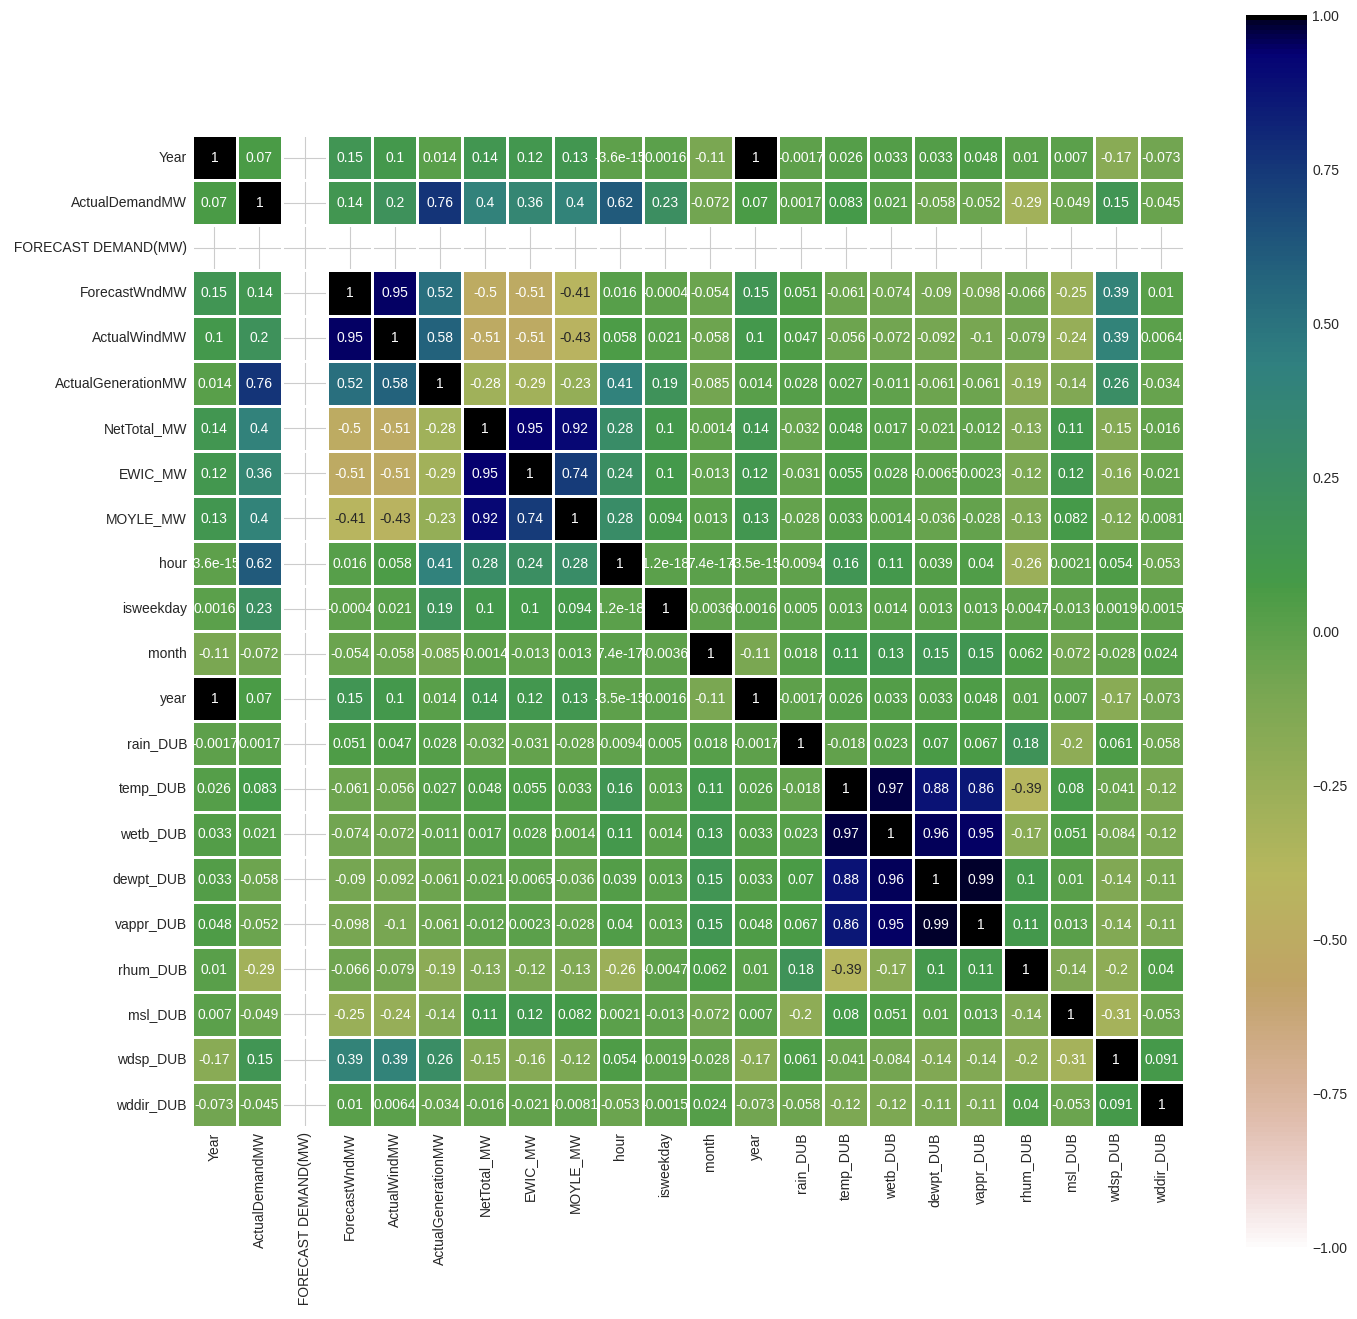

In [152]:
col_list_numerical = ['date', 'Year', 'Month', 'DayTime', ' REGION', 'ActualDemandMW',
       ' FORECAST DEMAND(MW)', 'ForecastWndMW', 'ActualWindMW',
       'ActualGenerationMW', 'NetTotal_MW', 'EWIC_MW', 'MOYLE_MW', 'hour',
       'isweekday', 'month', 'year', 'rain_DUB', 'temp_DUB', 'wetb_DUB', 'dewpt_DUB',
       'vappr_DUB', 'rhum_DUB', 'msl_DUB', 'wdsp_DUB', 'wddir_DUB']

df_corr = merged_df_hourly[col_list_numerical].corr()

plt.figure(figsize=[16, 16])
sns.heatmap(data=df_corr, vmin=-1, vmax=1, cmap='gist_earth_r', annot=True, square=True, linewidths=1)
plt.xticks(rotation=90)
plt.yticks(rotation=0)

<Figure size 1600x1600 with 0 Axes>

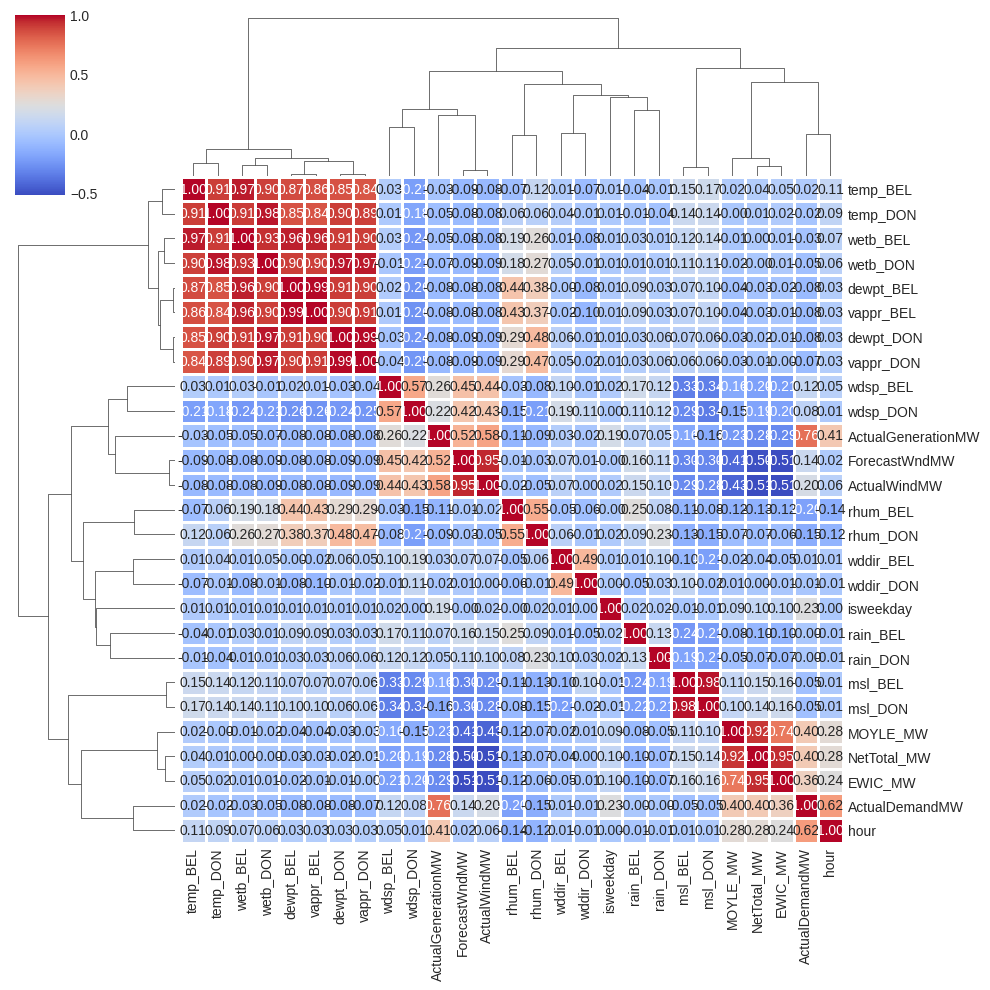

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select a subset of columns for visualization (adjust as needed)
subset_cols = ['ActualDemandMW', 'ForecastWndMW', 'ActualWindMW', 'ActualGenerationMW',
               'NetTotal_MW', 'EWIC_MW', 'MOYLE_MW', 'hour', 'isweekday', 'rain_BEL',
               'temp_BEL', 'wetb_BEL', 'dewpt_BEL', 'vappr_BEL', 'rhum_BEL', 'msl_BEL',
               'wdsp_BEL', 'wddir_BEL', 'rain_DON', 'temp_DON', 'wetb_DON', 'dewpt_DON',
               'vappr_DON', 'rhum_DON', 'msl_DON', 'wdsp_DON', 'wddir_DON']

# Create a subset of the correlation matrix
df_corr_subset = merged_df_hourly[subset_cols].corr()

# Set the size of the heatmap
plt.figure(figsize=[16, 16])

# Create a clustered heatmap
sns.clustermap(data=df_corr_subset, cmap='coolwarm', annot=True, fmt=".2f", linewidths=1)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()



(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5]),
 [Text(0, 0.5, 'rain_BEL'),
  Text(0, 1.5, 'temp_BEL'),
  Text(0, 2.5, 'rhum_BEL'),
  Text(0, 3.5, 'wdsp_BEL'),
  Text(0, 4.5, 'wddir_BEL'),
  Text(0, 5.5, 'rain_DUB'),
  Text(0, 6.5, 'rhum_DUB'),
  Text(0, 7.5, 'wdsp_DUB'),
  Text(0, 8.5, 'wddir_DUB'),
  Text(0, 9.5, 'rain'),
  Text(0, 10.5, 'temp'),
  Text(0, 11.5, 'rhum'),
  Text(0, 12.5, 'wdsp'),
  Text(0, 13.5, 'wddir'),
  Text(0, 14.5, 'rain_COR'),
  Text(0, 15.5, 'temp_COR'),
  Text(0, 16.5, 'rhum_COR'),
  Text(0, 17.5, 'wdsp_COR'),
  Text(0, 18.5, 'wddir_COR'),
  Text(0, 19.5, 'TotalWindCapacityMW'),
  Text(0, 20.5, 'hour'),
  Text(0, 21.5, 'isweekday'),
  Text(0, 22.5, 'month'),
  Text(0, 23.5, 'year'),
  Text(0, 24.5, 'ActualWindMW'),
  Text(0, 25.5, 'ActualDemandMW')])

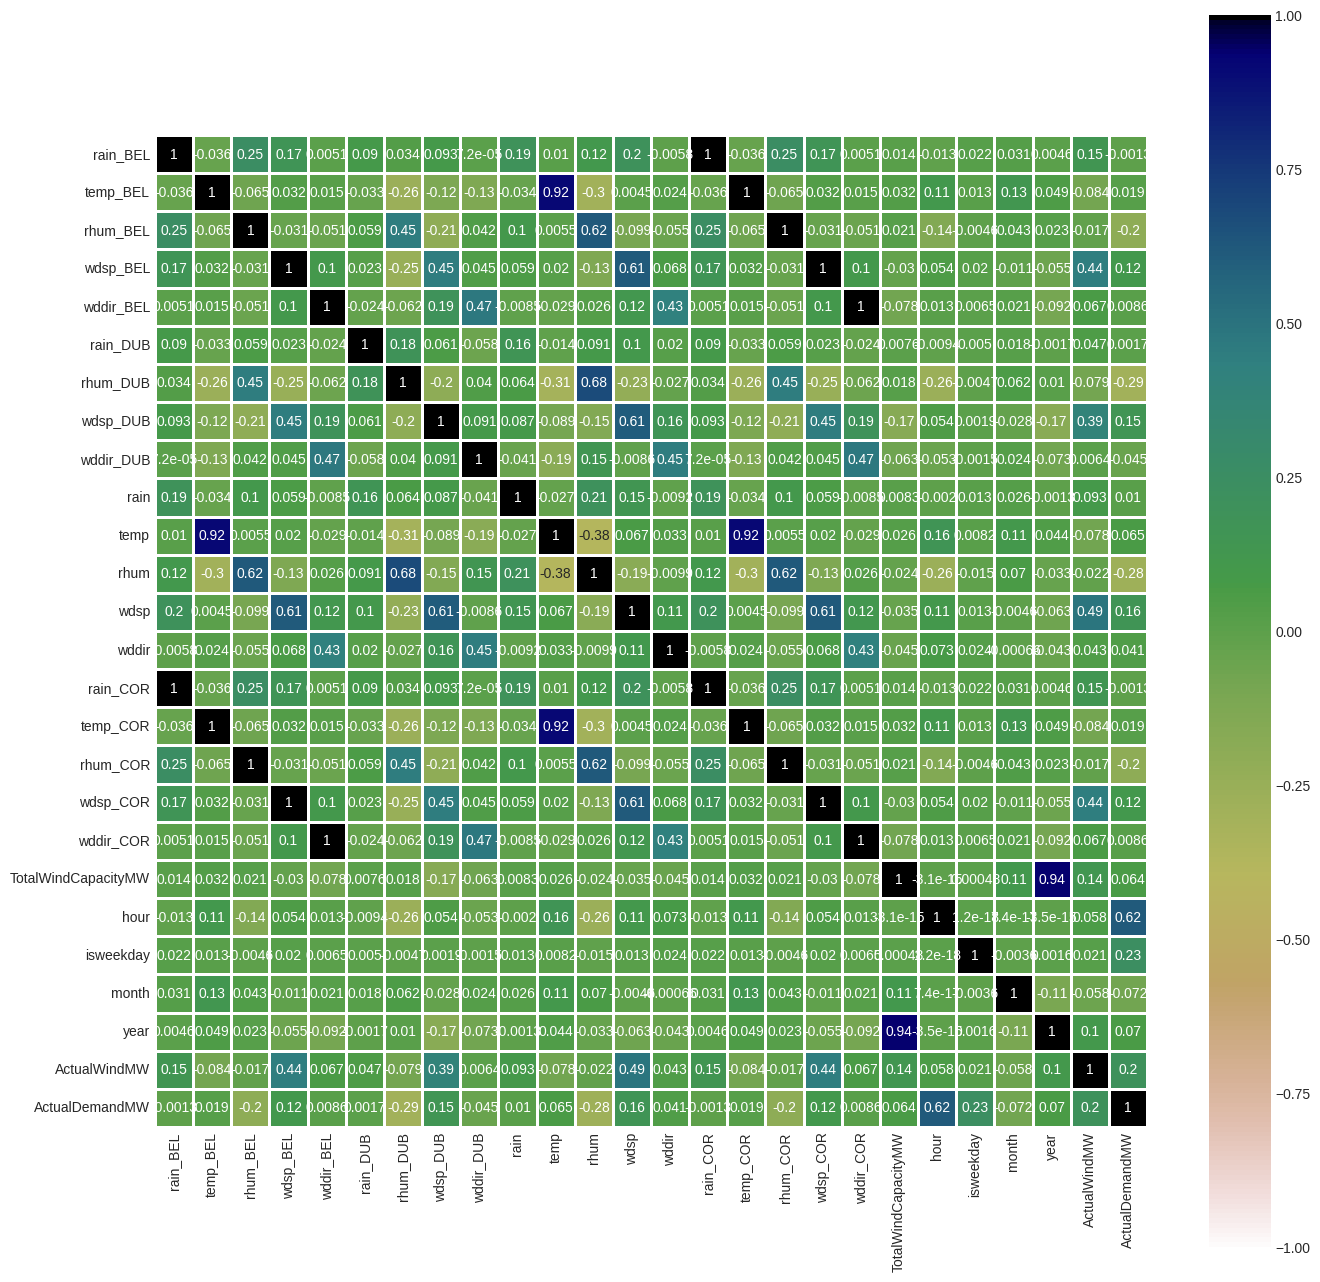

In [226]:

col_list_numerical = ['rain_BEL', 'temp_BEL',
       'rhum_BEL', 'wdsp_BEL', 'wddir_BEL', 'rain_DUB',
       'rhum_DUB', 'wdsp_DUB',
       'wddir_DUB', 'rain', 'temp', 'rhum', 'wdsp',
       'wddir',
       'rain_COR', 'temp_COR', 'rhum_COR',
       'wdsp_COR', 'wddir_COR', 'TotalWindCapacityMW',
       'hour', 'isweekday', 'month', 'year', 'ActualWindMW', 'ActualDemandMW']

df_corr = merged_df_hourly_df[col_list_numerical].corr()

plt.figure(figsize=[16, 16])
sns.heatmap(data=df_corr, vmin=-1, vmax=1, cmap='gist_earth_r', annot=True, square=True, linewidths=1)
plt.xticks(rotation=90)
plt.yticks(rotation=0)